In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division


In [2]:
#Let's use Yahoo and pandas to grab some data for some tech stocks.
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
# 1 yr from now
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
# globals()[stock] trying to make [stock] a global variable
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)



In [3]:

# Quick note: Using globals() is a sloppy way of setting 
#the DataFrame names, but its simple

# Let's go ahead and play aorund with the AAPL DataFrame 
#to get a feel for the data

In [4]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,119.372988,120.458884,118.103825,119.285976,5.300870e+07,118.432338
std,8.383043,8.154398,8.498374,8.282315,2.094462e+07,8.344256
min,94.870003,99.959999,92.000000,99.760002,1.447960e+07,98.083298
25%,112.189999,113.244999,110.509998,112.215001,3.856025e+07,111.273454
50%,118.809998,119.989998,117.830002,118.930000,4.819680e+07,117.901617
75%,127.165001,127.934998,125.985000,126.915001,6.152650e+07,126.029532
max,134.460007,134.539993,131.399994,133.000000,1.622063e+08,131.942761


In [5]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2014-10-20 to 2015-10-16
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Volume       251 non-null int64
Adj Close    251 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [6]:
# Now that we've seen the DataFrame, 
# let's go ahead and plot out the volume and closing price of the stocks


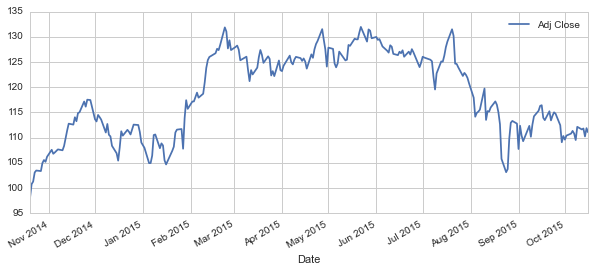

In [7]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

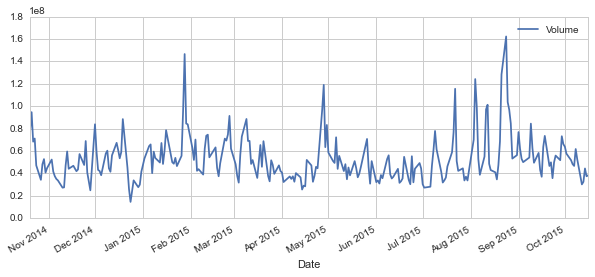

In [8]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [9]:
# Now that we've seen the visualizations 
# for the closing price and the volume traded each day, 
#let's go ahead and caculate the moving average for the stock.

# For more info on the moving average check out the following links:

# 1.) http://www.investopedia.com/terms/m/movingaverage.asp

# 2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [10]:
# Luckily pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

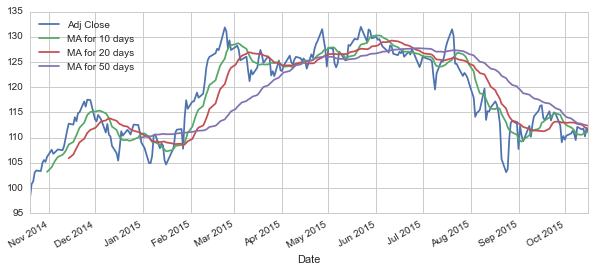

In [11]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))
#subplot = False, because we do not want a column plotting separated graphs

In [12]:
# Section 2 - Daily Return Analysis
# Now that we've done some baseline analysis, 
# let's go ahead and dive a little deeper. 
# We're now going to analyze the risk of the stock. 
# In order to do so 
# we'll need to take a closer look at the daily changes of the stock, 
# and not just its absolute value. Let's go ahead and
# use pandas to retrieve teh daily returns for the Apple stock.

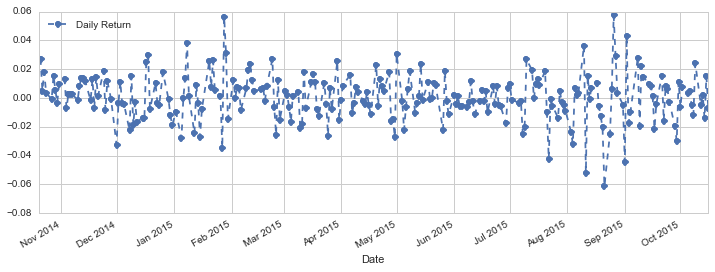

In [13]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),
                          legend=True,linestyle='--',marker='o')

In [14]:
# Great, now let's get an overall 
# look at the average daily return using a histogram. 
# We'll use seaborn to create both a histogram 
# and kde plot on the same figure.

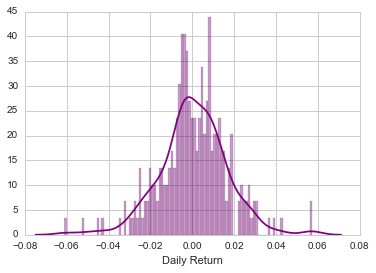

In [15]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

# Could have also done:
#AAPL['Daily Return'].hist()


In [16]:

# Now what if we wanted to analyze the returns of all the stocks in our list?
# Let's go ahead and build a DataFrame with 
# all the ['Close'] columns for each of the stocks dataframes.


In [17]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [18]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-10-20,98.083298,306.209991,520.842410,42.930253
2014-10-21,100.747749,315.329987,526.542369,43.709386
2014-10-22,101.259006,312.970001,532.712427,43.222427
2014-10-23,103.068084,313.179993,543.982410,43.845733
2014-10-24,103.451529,287.059998,539.782476,44.926782


In [19]:
# Now that we have all the closing prices,
# let's go ahead and get the daily return for all the stocks, 
# like we did for the Apple stock.



In [20]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


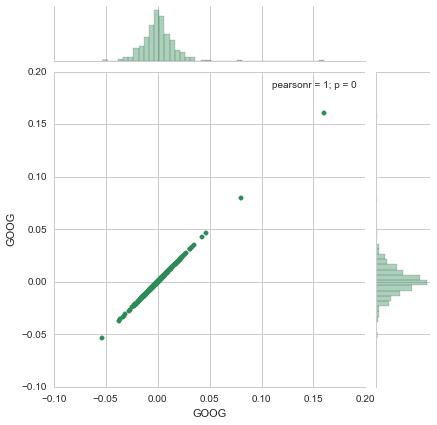

In [21]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

In [22]:
# So now we can see that if two stocks are 
# perfectly (and positivley) correlated with each other at 
# a linear relationship bewteen its daily return values should occur. 
# So let's go ahead and compare Google and Microsoft the same way.

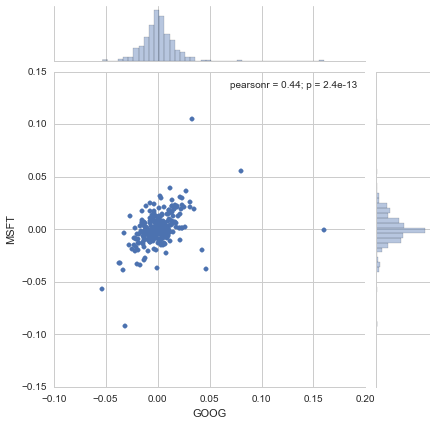

In [23]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [24]:

# Intersting, the pearsonr value (officially known as 
# the Pearson product-moment correlation coefficient)
# can give you a sense of how correlated the daily percentage returns are.
# You can find more information about it at this link:
# url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

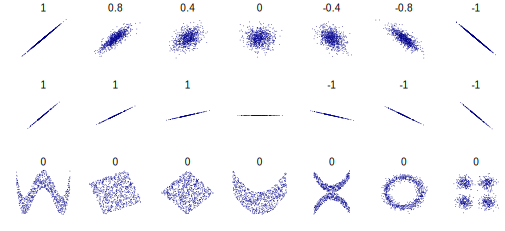

In [25]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

In [26]:

# Seaborn and pandas make it very easy to repeat this comparison analysis 
# for every possible combination of stocks 
# in our technology stock ticker list.
# We can use sns.pairplot() to automatically create this plot

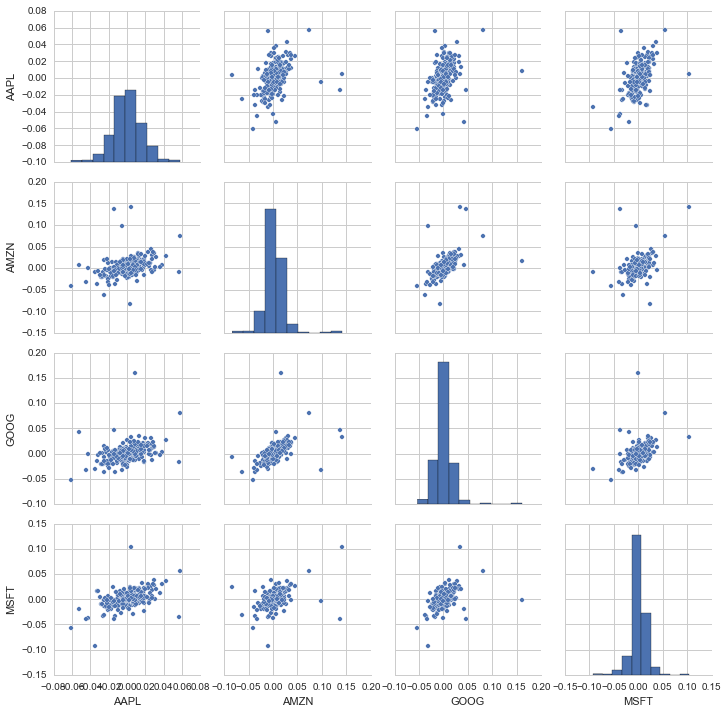

In [27]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

C:\Anaconda\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


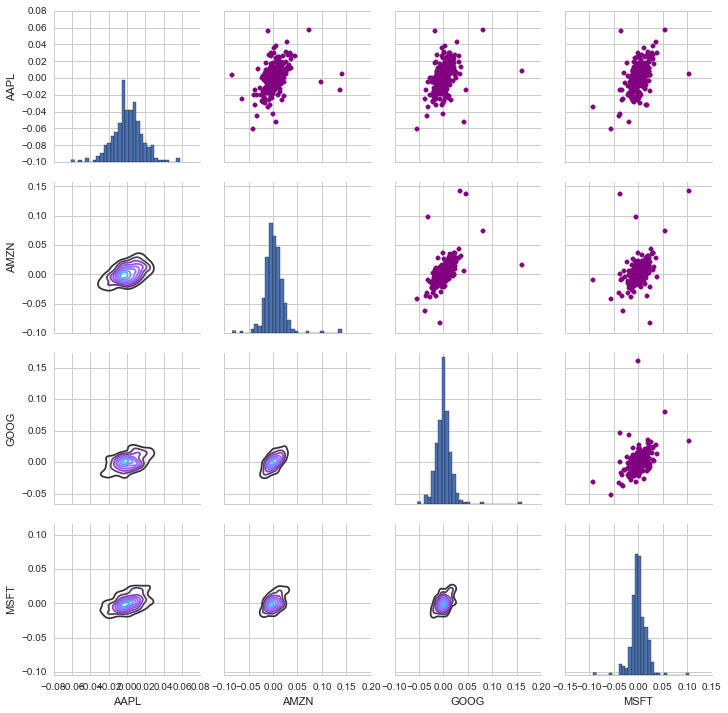

In [28]:
# Above we can see all the relationships on daily returns 
# between all the stocks. 
# A quick glance shows an interesting correlation between Google and Amazon daily returns.
# It might be interesting to investigate that individual comaprison. 
# While the simplicity of just calling sns.pairplot() is fantastic 
# we can also use sns.PairGrid() for full control of the figure, 
# including what kind of plots go in the diagonal, the upper triangle, 
# and the lower triangle. Below is an example of utilizing the full power
# of seaborn to achieve this result.

#Below is about the daily returns
#The below graphing is based on the diagonal line
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

In [29]:
# We could have also analyzed the correlation of the closing prices 
#using this exact same technique.
#Here it is shown, the code repeated from above 
#with the exception of the DataFrame called.

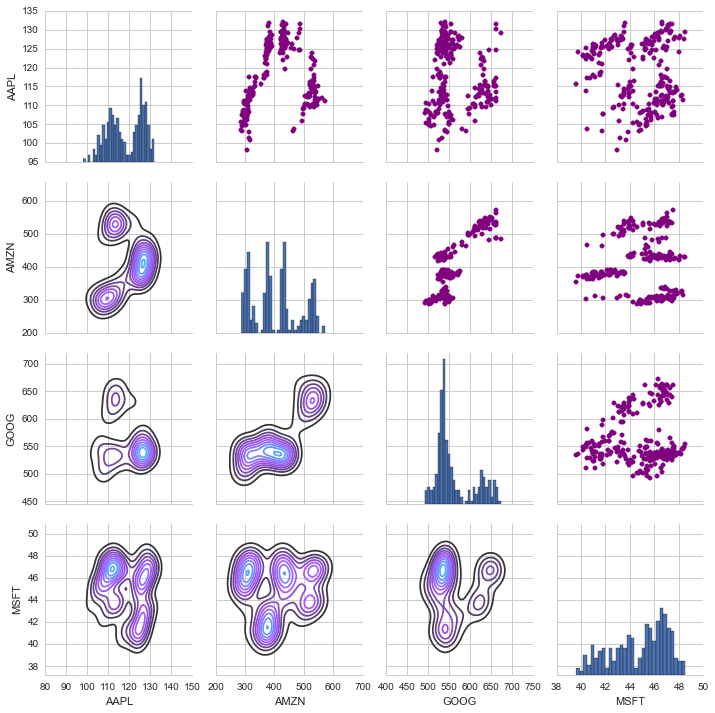

In [30]:
#below is for the closing prices
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

In [31]:
# Finally, we could also do a correlation plot, 
# to get actual numerical values 
# for the correlation between the stocks' daily return values.
# By comparing the closing prices, 
# we see an interesting relationship between Microsoft and Apple.

C:\Anaconda\lib\site-packages\seaborn\linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Anaconda\lib\site-packages\seaborn\linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


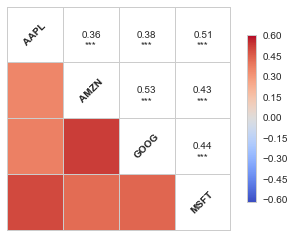

In [32]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.corrplot(tech_rets.dropna(),annot=True)

In [33]:
#Amazon and google has the strongest correlation
#of .6 on daily returns

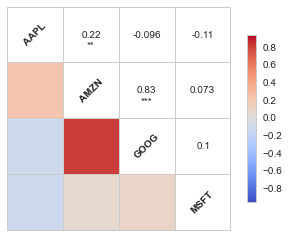

In [34]:
sns.corrplot(closing_df,annot=True)

In [35]:
#Still Amazon and Google has a .83 correlation on closing prices

In [36]:

# Risk Analysis

# There are many ways we can quantify risk, 
# one of the most basic ways using the information 
# we've gathered on daily percentage returns is by comparing the expected return 
# with the standard deviation of the daily returns.

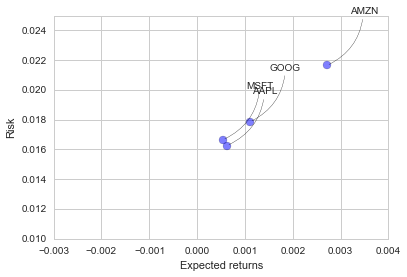

In [37]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot 
#(optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [38]:
# Value at Risk
# Let's go ahead and define a value at risk parameter for our stocks.
# We can treat value at risk 
# as the amount of money we could expect to lose 
# (aka putting at risk) for a given confidence interval. 
# Theres several methods we can use for estimating a value at risk. 
# Let's go ahead and see some of them in action.

In [39]:

# Value at risk using the "bootstrap" method
# For this method we will calculate the empirical quantiles
#from a histogram of daily returns. 
#For more information on quantiles, 

# check out this link: 
# http://en.wikipedia.org/wiki/Quantile

# Let's go ahead and repeat the daily returns histogram for Apple stock.

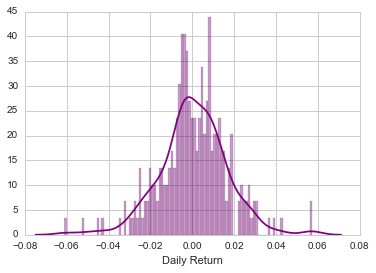

In [40]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


In [41]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.025298214980969558

In [42]:
# The 0.05 empirical quantile of daily returns is at -0.0253 
# That means that with 95% confidence, 
# our worst daily loss will not exceed 2.53%.
# If we have a 1 million dollar investment, 
# our one-day 5% VaR is 0.0253 * 1,000,000 = $25,300

# Go ahead and repeat this for the other stocks in out portfolio



In [43]:

# then afterwards
# we'll look at value at risk by implementing a Monte Carlo method.

In [44]:
# Value at Risk using the Monte Carlo method
# Using the Monte Carlo to run many trials with random market conditions, 
# then we'll calculate portfolio losses for each trial.
# After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

# Let's start with a brief explanation of what we're going to do:

# We will use the geometric Brownian motion (GBM), 
# which is technically known as a Markov process.
# This means that the stock price follows a random walk 
# and is consistent with (at the very least) 
# the weak form of the efficient market hypothesis (EMH):
# past price information is already incorporated 
# and the next price movement is "conditionally independent"
# of past price movements.

# This means that the past information on the price of a stock is independent
# of where the stock price will be in the future, 
# basically meaning, you can't perfectly predict the future solely 
# based on the previous price of a stock.

# The equation for geometric Browninan motion is given by the following equation:
# ΔS/S=μ*Δt+σ*ϵ*sqr(Δt)

# Where S is the stock price, mu is the expected return 
# (which we calculated earlier),
# sigma is the standard deviation of the returns, t is time, 
# and epsilon is the random variable.

# We can mulitply both sides by the stock price (S) to
# rearrange the formula and solve for the stock price.

In [45]:

# ΔS=S(μ*Δt+σ*ϵ*sqr(Δt))
#
#'ϵ' here means Z(t),which is a randomized factor
# Now we see that the change in the stock price is the current stock price 
# multiplied by two terms. 
# The first term is known as "drift", 
# which is the average daily return multiplied by the change of time. 
# The second term is known as "shock", 
# for each tiem period the stock will "drift"
# and then experience a "shock" 
# which will randomly push the stock price up or down. 
# By simulating this series of steps of drift and shock thousands of times, 
# we can begin to do a simulation 
# of where we might expect the stock price to be.

# For more info on the Monte Carlo method for stocks, 
# check out the following link: 
# http://www.investopedia.com/articles/07/montecarlo.asp

# To demonstrate a basic Monte Carlo method, 
# we will start with just a few simulations.
# First we'll define the variables we'll be using the Google DataFrame GOOG

In [46]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [47]:

# Next, we will create a function that takes in the starting price 
# and number of days, 
# and uses the sigma and mu we already calculated form out daily returns

In [48]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    #numpy.zero(number) means creating a "number" of zeros in a array,
    #dynamic programming
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

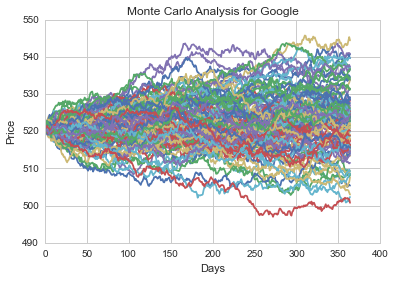

In [49]:
# Get start price from GOOG.head()
start_price = 520.84

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')


In [50]:

# Let's go ahead and get a histogram of the end results 
# for a much larger run. 
# (note: This could take a little while to run , depending on
#  the number of runs chosen)


In [57]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

In [52]:
# Now that we have our array of simulations,
# we can go ahead and plot a histogram,
# as well as use qunatile to define our risk for this stock.

# For more info on quantiles,
# check out this link: http://en.wikipedia.org/wiki/Quantile

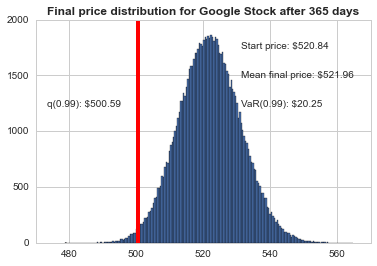

In [59]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');


In [54]:
# Now we have looked at the 1% empirical quantile 
# of the final price distribution 
# to estimate the Value at Risk for the Google stock, 
# which looks to be $20.41
# for every investment of 520.84 (the price of one inital google stock).

In [55]:
# It menas for every initial stock you purchase 
# your putting about $20.41 at risk 99% of the time 
# from our Monte Carlo Simulation.

In [56]:
# 1.) Estimate the values at risk using both methods we learned 
#     in this project for a stock
#     not related to technology.

# 2.) Build a practice portfolio and see how well you can predict your 
#     risk values with real stock information!

# 3.) Look further into correlation of two stocks 
#     and see if that gives you any insight 
#     into future possible stock prices.